# DSSATTools Example notebook

In this notebook you'll see the basic usage of DSSATools library to:
1. Create the inputs
2. Initialize the simulation environment
3. Run simulations
4. Modify input objects
5. Read outputs.

The idea of this library is to be a low-code interface to DSSAT

In [1]:
from DSSATTools import (
    Crop, SoilProfile, WeatherData, WeatherStation,
    Management, DSSAT
)
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

## Create a WeatherData instance

In [2]:
# Random weather data
DATES = pd.date_range('2000-01-01', '2010-12-31')
N = len(DATES)
df = pd.DataFrame(
    {
    'tn': np.random.gamma(10, 1, N),
    'rad': np.random.gamma(10, 1.5, N),
    'prec': [0.0]* N,
    'rh': 100 * np.random.beta(1.5, 1.15, N),
    },
    index=DATES,
)
df['TMAX'] = df.tn + np.random.gamma(5., .5, N)
df.head()

,tn,rad,prec,rh,TMAX
2000-01-01,11.291847,13.854907,0.0,60.096541,12.499014
2000-01-02,9.859719,12.189869,0.0,60.052103,14.794894
2000-01-03,8.674694,15.348776,0.0,2.133355,11.058132
2000-01-04,9.127612,19.813071,0.0,67.612515,13.243467
2000-01-05,7.350547,11.623290,0.0,59.606291,10.236600


In [3]:
# Create a WeatherData instance
WTH_DATA = WeatherData(
    df,
    variables={
        'tn': 'TMIN', 'TMAX': 'TMAX',
        'prec': 'RAIN', 'rad': 'SRAD',
        'rh': 'RHUM'
    }
)
# Create a WheaterStation instance
wth = WeatherStation(
    WTH_DATA, 
    {'ELEV': 33, 'LAT': 0, 'LON': 0, 'INSI': 'dpoes'}
)

## Create a SoilProfile object from a default profile

In [4]:
# Soil instance from default soil profile
soil = SoilProfile(default_class='SIL')

## Create a Crop object from default crop file

In [5]:
# Crop
crop = Crop('maize')
# Check how the cultivar looks like
crop.cultivar['IB0001']

{'VRNAME..........': 'CORNL281',
 'EXPNO': '.',
 'ECO#': 'IB0001',
 'P1': 110.0,
 'P2': 0.3,
 'P5': 685.0,
 'G2': 907.9,
 'G3': 6.6,
 'PHINT': 38.9}

## Create a management instance

In [7]:
# Management instance
man = Management(
    cultivar='IB0001',
    planting_date=DATES[10],
)
# Modify harvest to Automatic
man.simulation_controls['HARVS'] = 'A'
# Check the simulation control value for Irrigation
man.simulation_controls['IRRIG']

'R'

## Setup the simulation environment and run the model

In [8]:
dssat = DSSAT()
dssat.setup()
dssat.run(
    soil=soil, weather=wth, crop=crop, management=man,
)

C:\Users\FS\AppData\Local\Temp\dssatshknonia created.
Static files copied to C:\Users\FS\AppData\Local\Temp\dssatshknonia.
  Crop failure growth program terminated 
     Conditions not met during defined window for harvesting                       
     between DAY 2000 119 and DAY 2002  10                                         
RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 MZ   1 -99  97   146     0     0     0    43    26     0   -99      0  140


## Save the outputs

In [9]:
# Print available outputs
dssat.OUTPUT_LIST

['PlantGro']

In [10]:
# Save the output
output_1 = dssat.output['PlantGro']
output_1.head()

,@YEAR,DOY,DAS,DAP,L#SD,GSTD,LAID,LWAD,SWAD,GWAD,...,RL5D,RL6D,RL7D,RL8D,CDAD,LDAD,SDAD,SNW0C,SNW1C,DTTD
2000-01-11,2000,011,2,0,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,4.49
2000-01-12,2000,012,3,1,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1.67
2000-01-13,2000,013,4,2,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,8.28
2000-01-14,2000,014,5,3,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,3.47
2000-01-15,2000,015,6,4,0.0,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,8.12


## Modify Irrigation management and run again

In [11]:
# Modify management and run again
man.simulation_controls['IRRIG'] = 'A' # Automatic Irrigation
dssat.run(
    soil=soil, weather=wth, crop=crop, management=man,
)
output_2 = dssat.output['PlantGro']

RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 MZ   1 155 352 19774  9599     0   775   822    22     0   -99      0  141


## Modify a cultivar parameter and run again

In [12]:
# Now modify a cultivar parameter and run that again
crop.cultivar['IB0001']['P1'] = 50
dssat.run(
    soil=soil, weather=wth, crop=crop, management=man,
)
output_3 = dssat.output['PlantGro']

     Conditions not met during defined window for harvesting                       
     between DAY 2000 338 and DAY 2002  10                                         
RUN    TRT FLO MAT TOPWT HARWT  RAIN  TIRR   CET  PESW  TNUP  TNLF   TSON TSOC
           dap dap kg/ha kg/ha    mm    mm    mm    mm kg/ha kg/ha  kg/ha t/ha
  1 MZ   1 124 316 15562  8837     0   692   778     0     0   -99      0  140


## Check the results for the yield

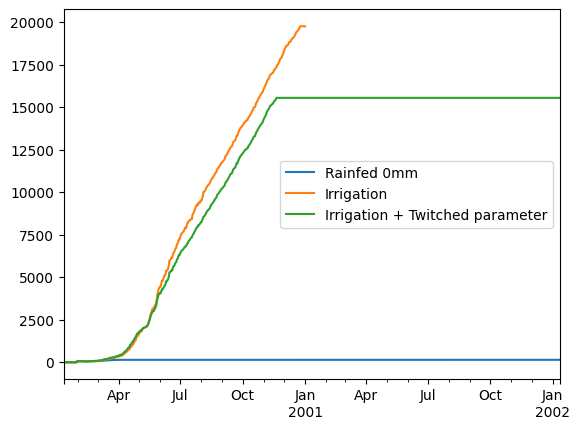

In [13]:
ax = output_1.CWAD.plot(label='Rainfed 0mm')
output_2.CWAD.plot(label='Irrigation', ax=ax)
output_3.CWAD.plot(label='Irrigation + Twitched parameter', ax=ax)
ax.legend()